## The Sparks Foundation GRIP December 2022 Data Science & Business Analytics

#GRIPDECEMBER22

Name : Sakshi Lathi

task 3: Perform 'Exploratory Data Analysis' on data set ' Global Terrorism'                                                     
As a security/defense analyst, try to find out the hot zone of terrorism. What all security issues and insights you can derive by EDA?                 
Dataset : https://bit.ly/2TK5Xn5

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
dataset = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='latin1')
dataset.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### EDA (Exploratory Data Analysis)

In [5]:
dataset.shape

(181691, 135)

There are 181691 rows and 135 columns present in dataset

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [8]:
#Creating list of columns name in dataset
print("Column Names in Terrorism DataSet:\n"+34*"*")
for i in dataset.columns.tolist():
    print(i)

Column Names in Terrorism DataSet:
**********************************
eventid
iyear
imonth
iday
approxdate
extended
resolution
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
location
summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
corp1
target1
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
gname
gsubname
gname2
gsubname2
gname3
gsubname3
motive
guncertain1
guncertain2
guncertain3
individual
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt

In [10]:
dataset_final = dataset[['iyear','imonth','iday','country_txt','region_txt','provstate','attacktype1_txt',
                                  'targtype1_txt','target1','weaptype1_txt','nkill','nwound','gname','summary']]
dataset_final.rename(columns={"iyear":"Year",
                                   "imonth":"Month",
                                   "iday":"Day",
                                   "country_txt":"Country",
                                   "region_txt":"Region",
                                   "provstate":"State",
                                   "attacktype1_txt":"Attacktype",
                                   "targtype1_txt":"target_type",
                                   "target1":"target",
                                   "weaptype1_txt":"Weapon_type",
                                   "nkill":"No_of_Killed",
                                   "nwound":"No_of_Wounded",
                                   "gname":"Group"},inplace=True)
dataset_final.sample(6)

,Year,Month,Day,Country,Region,State,Attacktype,target_type,target,Weapon_type,No_of_Killed,No_of_Wounded,Group,summary
9542,1979,10,24,Nicaragua,Central America & Caribbean,Managua,Armed Assault,Military,Sandinista army barracks,Firearms,NaN,NaN,Unknown,NaN
159642,2016,3,3,Thailand,Southeast Asia,Yala,Armed Assault,Private Citizens & Property,Rubber Tapper: Chatchai Sae Thong,Firearms,1.0,0.0,Unknown,03/03/2016: Assailants opened fire on Chatchai...
180688,2017,11,22,South Sudan,Sub-Saharan Africa,Southern Liech,Armed Assault,Military,Soldiers,Firearms,11.0,4.0,Sudan People's Liberation Movement in Oppositi...,11/22/2017: Assailants attacked military posit...
41178,1990,1,11,Peru,South America,Junin,Bombing/Explosion,Utilities,High tension line tower,Explosives,0.0,0.0,Shining Path (SL),NaN
161380,2016,4,19,Turkey,Middle East & North Africa,Sirnak,Bombing/Explosion,Military,Soldiers,Explosives,2.0,6.0,Kurdistan Workers' Party (PKK),04/19/2016: An explosive device detonated targ...
172236,2017,2,18,Afghanistan,South Asia,Nangarhar,Bombing/Explosion,Private Citizens & Property,Civilians,Explosives,0.0,11.0,Khorasan Chapter of the Islamic State,02/18/2017: Assailants detonated an explosive ...


In [11]:
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Year           181691 non-null  int64  
 1   Month          181691 non-null  int64  
 2   Day            181691 non-null  int64  
 3   Country        181691 non-null  object 
 4   Region         181691 non-null  object 
 5   State          181270 non-null  object 
 6   Attacktype     181691 non-null  object 
 7   target_type    181691 non-null  object 
 8   target         181055 non-null  object 
 9   Weapon_type    181691 non-null  object 
 10  No_of_Killed   171378 non-null  float64
 11  No_of_Wounded  165380 non-null  float64
 12  Group          181691 non-null  object 
 13  summary        115562 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 19.4+ MB


In [12]:
dataset_final.describe()

,Year,Month,Day,No_of_Killed,No_of_Wounded
count,181691.000000,181691.000000,181691.000000,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,2.403272,3.167668
std,13.259430,3.388303,8.814045,11.545741,35.949392
min,1970.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,2.000000,2.000000
max,2017.000000,12.000000,31.000000,1570.000000,8191.000000


### Data Cleaning

In [13]:
dataset_final.isnull().sum()

Year                 0
Month                0
Day                  0
Country              0
Region               0
State              421
Attacktype           0
target_type          0
target             636
Weapon_type          0
No_of_Killed     10313
No_of_Wounded    16311
Group                0
summary          66129
dtype: int64

In [14]:
# Missing values fill -
# 1. No of Killed =
dataset_final['No_of_Killed'].head()

0    1.0
1    0.0
2    1.0
3    NaN
4    NaN
Name: No_of_Killed, dtype: float64

In [15]:
dataset_final['No_of_Killed'] = dataset_final['No_of_Killed'].fillna(0)
dataset_final['No_of_Killed'].head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: No_of_Killed, dtype: float64

In [16]:
dataset_final.isnull().sum()

Year                 0
Month                0
Day                  0
Country              0
Region               0
State              421
Attacktype           0
target_type          0
target             636
Weapon_type          0
No_of_Killed         0
No_of_Wounded    16311
Group                0
summary          66129
dtype: int64

In [17]:
#2. No_of_Wounded 
dataset_final['No_of_Wounded'] = dataset_final['No_of_Wounded'].fillna(0)
dataset_final.isnull().sum()

Year                 0
Month                0
Day                  0
Country              0
Region               0
State              421
Attacktype           0
target_type          0
target             636
Weapon_type          0
No_of_Killed         0
No_of_Wounded        0
Group                0
summary          66129
dtype: int64

In [18]:
dataset_final['target'] = dataset_final['target'].fillna("Not Known")
dataset_final.isnull().sum()

Year                 0
Month                0
Day                  0
Country              0
Region               0
State              421
Attacktype           0
target_type          0
target               0
Weapon_type          0
No_of_Killed         0
No_of_Wounded        0
Group                0
summary          66129
dtype: int64

In [19]:
dataset_final['summary'] = dataset_final['summary'].fillna("Not Known")
dataset_final.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
State            421
Attacktype         0
target_type        0
target             0
Weapon_type        0
No_of_Killed       0
No_of_Wounded      0
Group              0
summary            0
dtype: int64

In [20]:
dataset_final.shape

(181691, 14)

In [21]:
dataset_final.duplicated().sum()

10146

There are 10146 duplicate values present so we have to drop them.

In [22]:
dataset_final = dataset_final.drop_duplicates()

In [23]:
dataset_final.shape

(171545, 14)

In [25]:
#Checking number of unique values in columns
dataset_final.nunique()

Year                 47
Month                13
Day                  32
Country             205
Region               12
State              2855
Attacktype            9
target_type          22
target            86007
Weapon_type          12
No_of_Killed        205
No_of_Wounded       238
Group              3537
summary          112493
dtype: int64

In [26]:
#Unique Values of each Column -
for col in dataset_final[:]:
    print(col,":", dataset_final[col].unique())
    print("-"*100)

Year : [1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1986 1982
 1983 1984 1985 1987 1988 1989 1990 1991 1992 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017]
----------------------------------------------------------------------------------------------------
Month : [ 7  0  1  2  3  4  5  6  8  9 10 11 12]
----------------------------------------------------------------------------------------------------
Day : [ 2  0  1  3  6  8  9 10 11 12 13 14 15 19 20 21 22 25 26 27 28 30 31  4
  7 16 17 18 23 24  5 29]
----------------------------------------------------------------------------------------------------
Country : ['Dominican Republic' 'Mexico' 'Philippines' 'Greece' 'Japan'
 'United States' 'Uruguay' 'Italy' 'East Germany (GDR)' 'Ethiopia'
 'Guatemala' 'Venezuela' 'West Germany (FRG)' 'Switzerland' 'Jordan'
 'Spain' 'Brazil' 'Egypt' 'Argentina' 'Lebanon' 'Ireland' 'Turkey'
 'Paraguay' 'Iran' 'U

summary : ['Not Known'
 '1/1/1970: Unknown African American assailants fired several bullets at police headquarters in Cairo, Illinois, United States.  There were no casualties, however, one bullet narrowly missed several police officers.  This attack took place during heightened racial tensions, including a Black boycott of White-owned businesses, in Cairo Illinois.'
 '1/2/1970: Unknown perpetrators detonated explosives at the Pacific Gas & Electric Company Edes substation in Oakland, California, United States.  Three transformers were damaged costing an estimated $20,000 to $25,000.  There were no casualties.'
 ...
 '12/31/2017: Assailants set fire to houses in Kubentog, Datu Hoffer, Maguindanao, Philippines. There were no reported casualties in the attack. No group claimed responsibility for the incident; however, sources attributed the attack to the Bangsamoro Islamic Freedom Movement (BIFM).'
 '12/31/2017: Assailants threw a grenade at a Forest Department office in Mantripukhri ne

In [27]:
dataset_final['Month'].value_counts()

5     15706
7     15349
8     14939
10    14705
6     14532
3     14444
4     14424
11    14257
1     14142
9     13246
2     13023
12    12758
0        20
Name: Month, dtype: int64

There are 13 unique values present in month column and there is a value 0 in the list so replace it with the most frequent occuring month

In [28]:
dataset_final["Month"].mode()

0    5
dtype: int64

In [29]:
dataset_final['Month'] = dataset_final['Month'].replace(0,dataset_final['Month'].mode()[0])

In [30]:
dataset_final['Month'].value_counts()

5     15726
7     15349
8     14939
10    14705
6     14532
3     14444
4     14424
11    14257
1     14142
9     13246
2     13023
12    12758
Name: Month, dtype: int64

### Data Visualization

In [31]:
dataset_final["Country"].value_counts()

Iraq             23440
Pakistan         13787
Afghanistan      12486
India            11557
Colombia          7486
                 ...  
St. Lucia            1
Andorra              1
South Vietnam        1
North Korea          1
Vatican City         1
Name: Country, Length: 205, dtype: int64

In [33]:
#Least affected countries by terroism
dataset_final["Country"].value_counts()[-10:]

Falkland Islands       1
Antigua and Barbuda    1
Wallis and Futuna      1
New Hebrides           1
International          1
St. Lucia              1
Andorra                1
South Vietnam          1
North Korea            1
Vatican City           1
Name: Country, dtype: int64

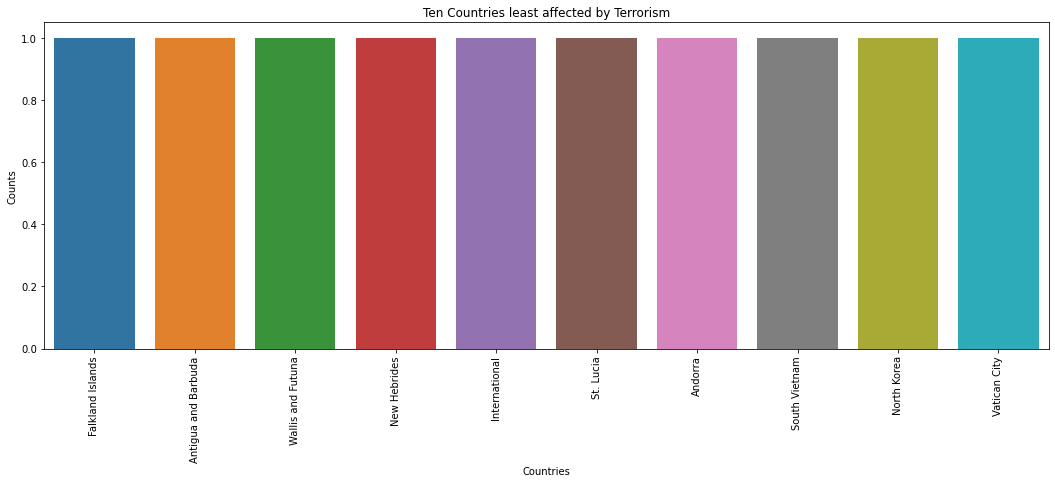

In [40]:
plt.figure(figsize=(18,6))
sns.barplot(x = dataset_final["Country"].value_counts()[-10:].index, y = dataset_final["Country"].value_counts()[-10:].values,data = dataset_final)
plt.title("Ten Countries least affected by Terrorism")
plt.xlabel("Countries")
plt.ylabel("Counts")
plt.xticks(rotation=90)
plt.show()

In [42]:
#Most affected by terroism
dataset_final["Country"].value_counts()[:10]

Iraq              23440
Pakistan          13787
Afghanistan       12486
India             11557
Colombia           7486
Philippines        6762
Peru               5031
United Kingdom     4962
El Salvador        4176
Somalia            4121
Name: Country, dtype: int64

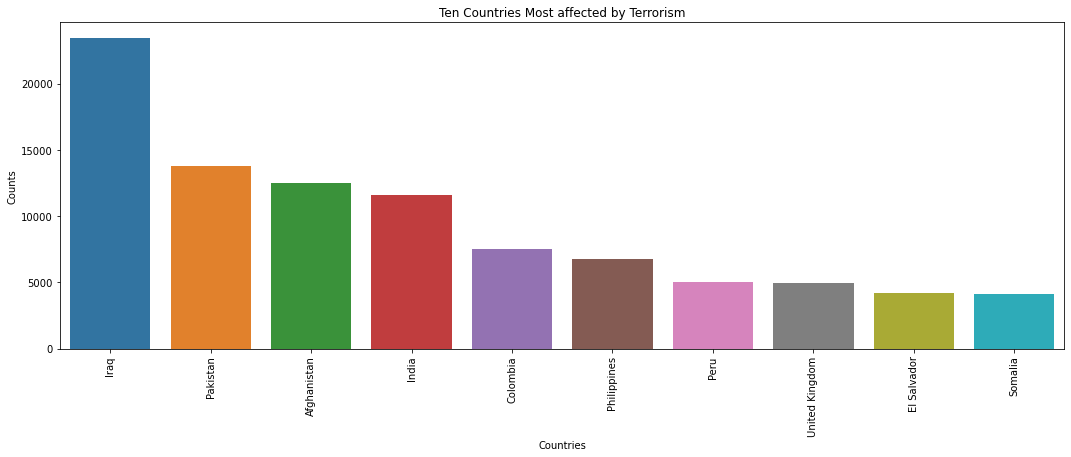

In [43]:
plt.figure(figsize=(18,6))
sns.barplot(x = dataset_final["Country"].value_counts()[:10].index, y = dataset_final["Country"].value_counts()[:10].values, data = dataset_final)
plt.title("Ten Countries Most affected by Terrorism")
plt.xlabel("Countries")
plt.ylabel("Counts")
plt.xticks(rotation=90)
plt.show()

Iraq followed by pakistan is most affected country in case of Terrorism

In [44]:
# Number of attacks every month in Iraq for the years i.e. 1970 - 2017
Iraq_month = dataset_final.query("Country=='Iraq'").groupby('Month').mean()
Iraq_month['Day']

Month
1     15.956591
2     14.937206
3     15.751384
4     14.984383
5     16.383422
6     14.747363
7     15.323278
8     15.271196
9     16.252549
10    16.383673
11    15.859426
12    15.778409
Name: Day, dtype: float64

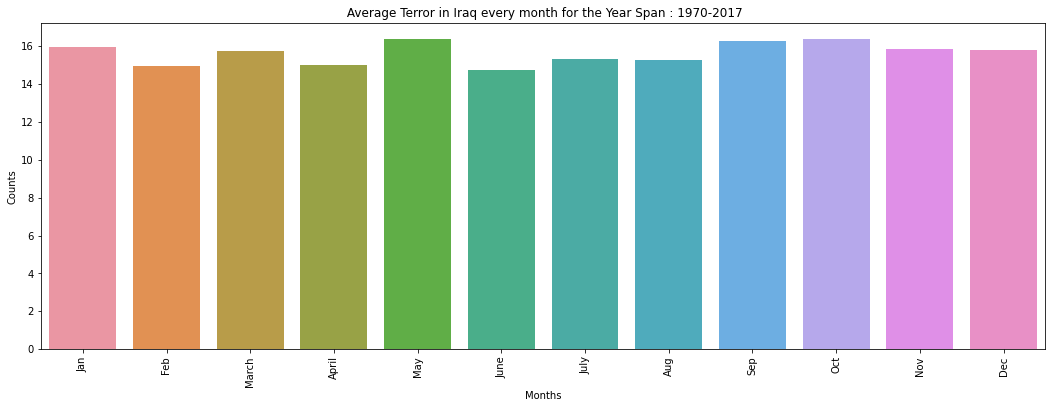

In [45]:
plt.figure(figsize=(18,6))
sns.barplot(x = ['Jan','Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec'], y = Iraq_month['Day'], data = Iraq_month)
plt.title(" Average Terror in Iraq every month for the Year Span : 1970-2017")
plt.xlabel("Months")
plt.ylabel("Counts")
plt.xticks(rotation=90)
plt.show()

 Iraq has on an average about 15 attacks each month for the year span 1970-2017

In [46]:
Region = dataset_final.groupby('Region')['Year'].count().sort_values(ascending=False).reset_index(name='Count')

In [47]:
Region

,Region,Count
0,Middle East & North Africa,48660
1,South Asia,43461
2,Sub-Saharan Africa,17060
3,South America,16528
4,Western Europe,15031
5,Southeast Asia,12057
6,Central America & Caribbean,8852
7,Eastern Europe,5007
8,North America,3349
9,East Asia,714


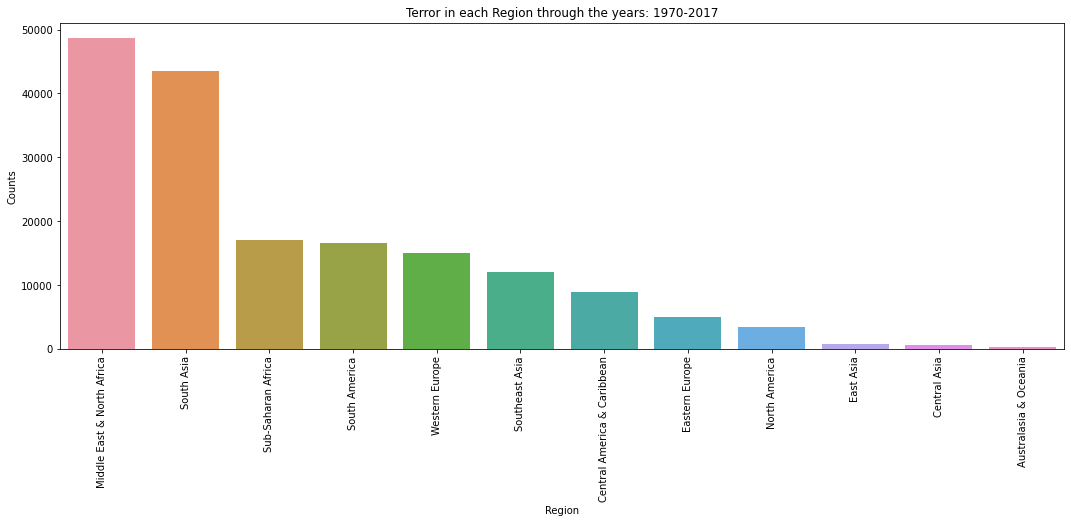

In [48]:
plt.figure(figsize=(18,6))
sns.barplot(x = 'Region', y = 'Count', data = Region)
plt.title("Terror in each Region through the years: 1970-2017")
plt.xlabel("Region")
plt.ylabel("Counts")
plt.xticks(rotation=90)
plt.show()

Top 3 regions where terrorism occurs most are : Middle East , North Africa, South Asia.                                         
Least 3 regions are Austrailia, Oceania, Central Asia.

In [49]:
# Analysing the Attack Types:
Attacktype = dataset_final["Attacktype"].value_counts().sort_values(ascending=False).reset_index(name='Count')
Attacktype

,index,Count
0,Bombing/Explosion,81858
1,Armed Assault,41129
2,Assassination,18872
3,Hostage Taking (Kidnapping),10968
4,Facility/Infrastructure Attack,9283
5,Unknown,6911
6,Hostage Taking (Barricade Incident),939
7,Unarmed Assault,932
8,Hijacking,653


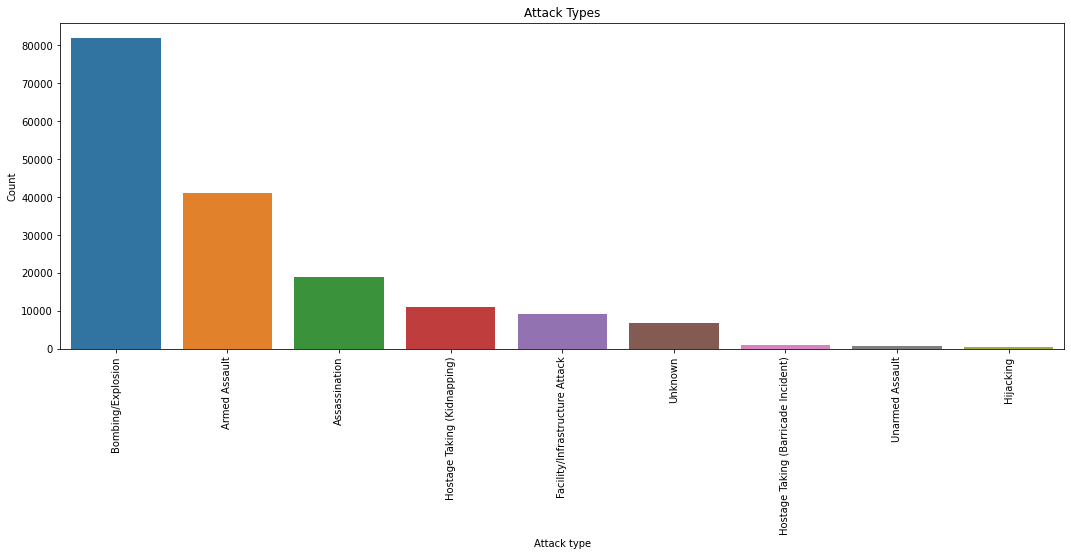

In [50]:
plt.figure(figsize=(18,6))
sns.barplot(x = Attacktype['index'], y = Attacktype['Count'])
plt.title("Attack Types")
plt.xlabel("Attack type")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

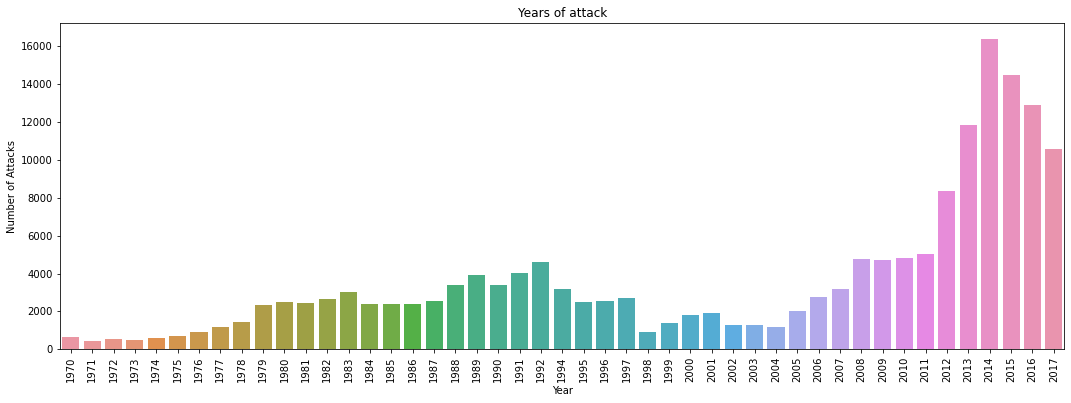

In [52]:
# Analysing the number of attacks that took place every year
years = dataset_final['Year'].unique()
count_of_years = dataset_final['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,6))
sns.barplot(x = years,y = count_of_years)
plt.xticks(rotation = 90)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Years of attack')
plt.show()

There is a increase in number of attack starting from 2012 which reached its maximum peak in the year 2014
After 2015 a it is decreasing

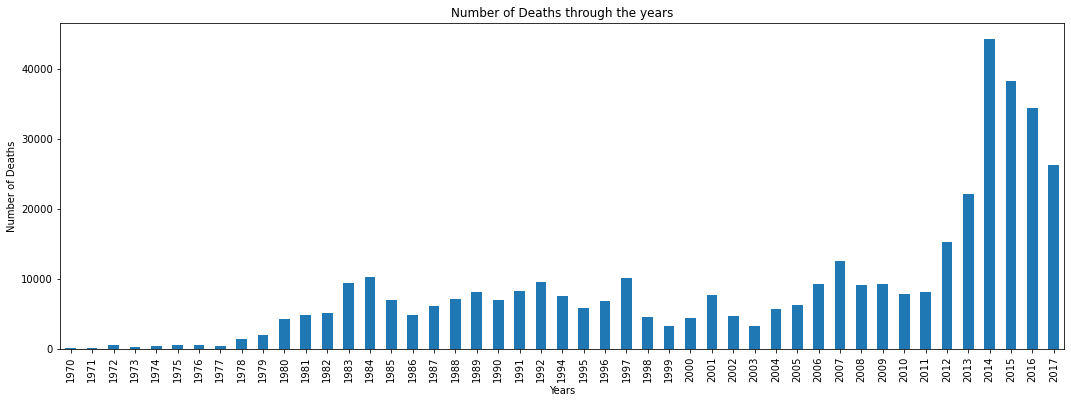

In [53]:
# Analysing the number of deaths taken place in each year.
plt.figure(figsize=(18,6))
dataset_final.groupby(['Year'])['No_of_Killed'].sum().plot(kind = 'bar')
plt.title('Number of Deaths through the years')
plt.xlabel('Years')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=90)
plt.show()

Number of people killed is maximum 0n 2014 which is 40000+

In [54]:
#Analysis regarding target type affected by attack
target = dataset_final["target_type"].value_counts().sort_values(ascending=False).reset_index(name='Count')

In [55]:
target

,index,Count
0,Private Citizens & Property,41395
1,Military,27386
2,Police,23761
3,Government (General),20454
4,Business,18827
5,Transportation,6089
6,Unknown,5203
7,Religious Figures/Institutions,4284
8,Educational Institution,4173
9,Utilities,4106


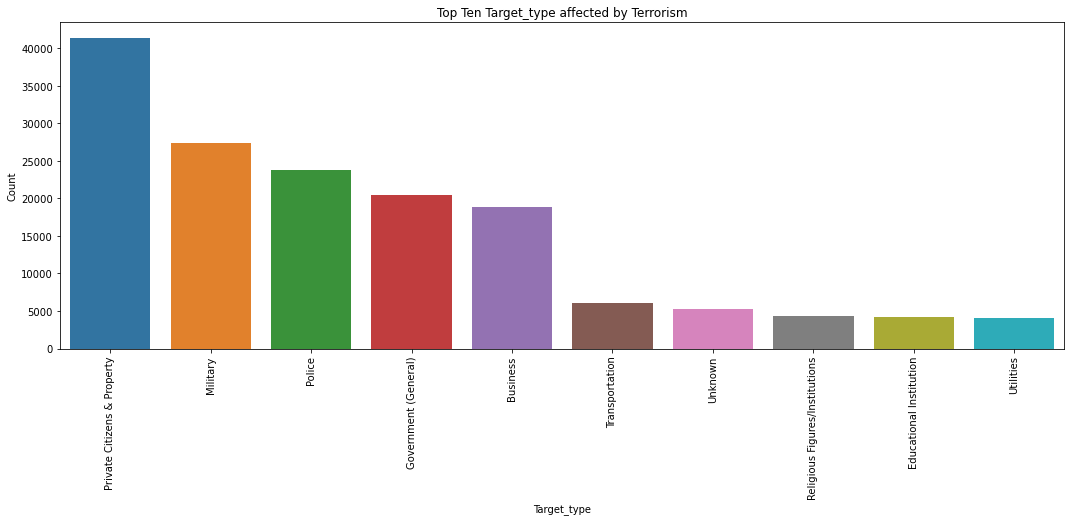

In [57]:
plt.figure(figsize=(18,6))
sns.barplot(x = target["index"][:10], y = target["Count"][:10])
plt.title("Top Ten Target_type affected by Terrorism")
plt.xlabel("Target_type",)
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

Private Citizens and property, Military is mostly affected by TERROR ATTACKS.

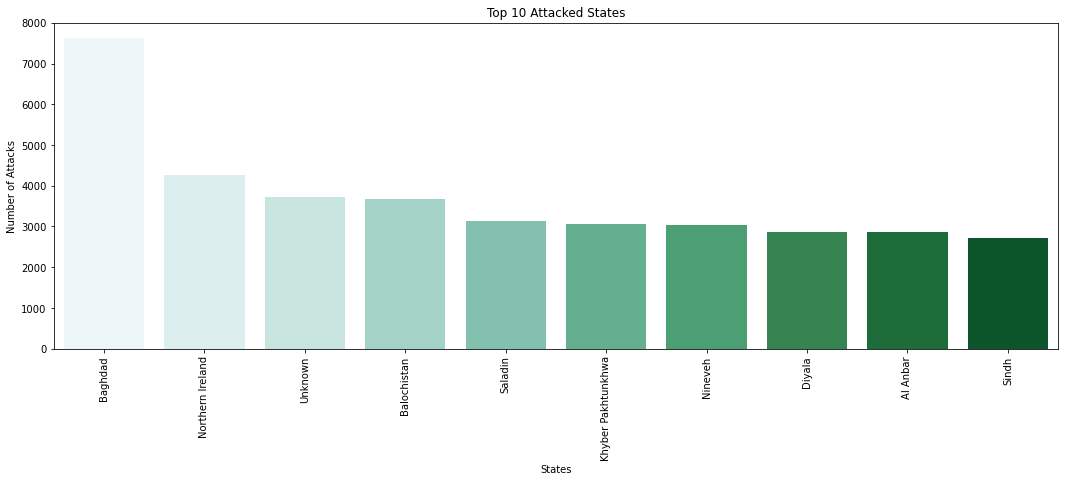

In [61]:
# States that were attacked the most
plt.figure(figsize=(18,6))
sns.barplot(x = dataset_final['State'].value_counts().head(10).index, y = dataset_final['State'].value_counts().head(10).values, palette="BuGn")
plt.title('Top 10 Attacked States')
plt.xlabel('States')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=90)
plt.show()

Bagdad is the most affected state in case of terrorism.

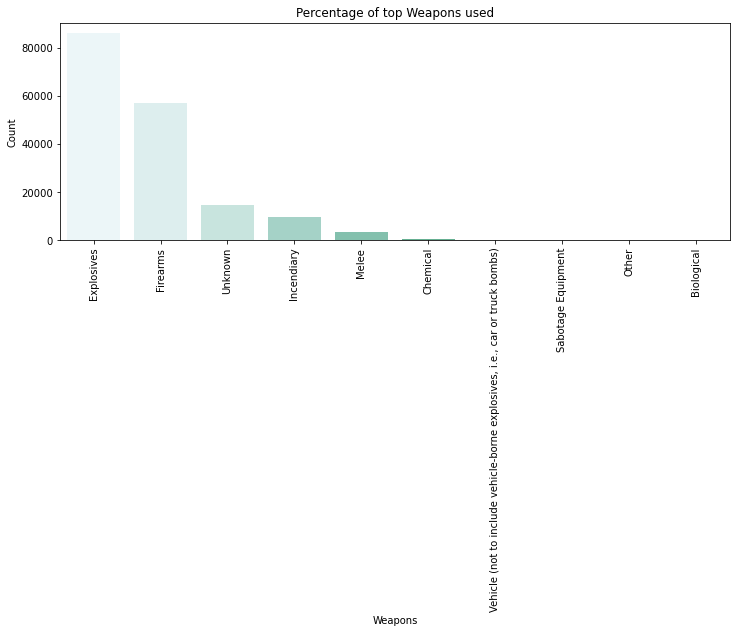

In [62]:
plt.figure(figsize=(12,4))
sns.barplot(x = dataset_final["Weapon_type"].value_counts()[:10].index, y = dataset_final["Weapon_type"].value_counts()[:10].values,palette="BuGn")
plt.title("Percentage of top Weapons used")
plt.xlabel("Weapons")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

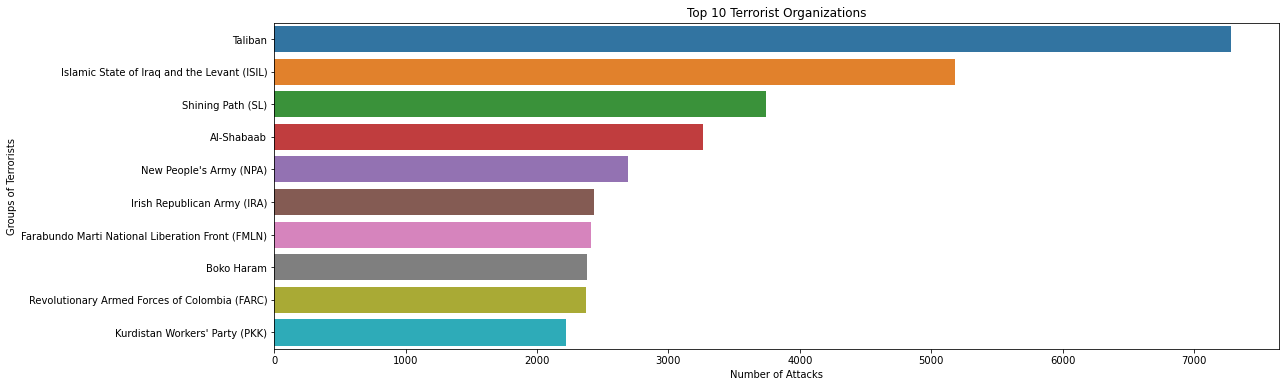

In [63]:
#top ten terrorist organisation 
plt.figure(figsize=(18,6))
sns.barplot(x = dataset_final['Group'].value_counts()[1:11].values, y = dataset_final['Group'].value_counts()[1:11].index)
plt.title('Top 10 Terrorist Organizations')
plt.xlabel('Number of Attacks')
plt.ylabel('Groups of Terrorists')
plt.show()

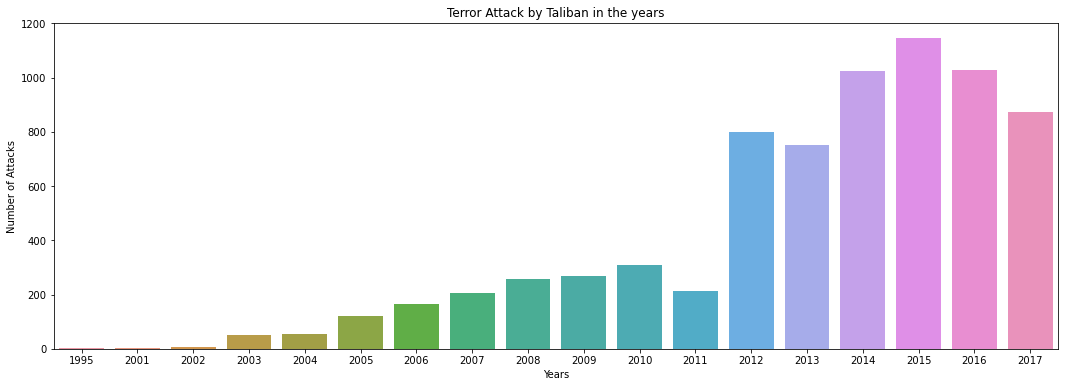

In [66]:
Taliban = dataset_final[dataset_final["Group"]=="Taliban"]
#Attacks over the years made by Taliban:

plt.figure(figsize = (18,6))
sns.barplot(x = Taliban['Year'].value_counts().index, y = Taliban['Year'].value_counts().values)
plt.title('Terror Attack by Taliban in the years')
plt.xlabel('Years')
plt.ylabel('Number of Attacks')
plt.show()

### Taliban is the most dangerous terrorist group followed by ISIL

We can conclude that :
Iraq followed by pakistan is most affected country in case of Terrorism.
Iraq has on an average about 15 attacks each month.
Bombing/Explosion is most frequent attack type followed by Armed Assault.
Maximum no. of deaths has been in the Middle East & North Africa region, followed by South Asia.
Private Citizens and property is mostly affected by terror attacks followed by Military.
Bagdad is the most affected state in case of terrorism.
Taliban is the most dangerous terrorist group followed by ISIL.